In [130]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast
import math
from scipy.stats import beta
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle, Arc
from matplotlib.collections import PatchCollection
from scipy.stats import vonmises
from scipy.optimize import minimize
import numpy as np
from scipy.special import i0


In [131]:
CLE = pd.read_csv("CLE_pass_shot_half.csv")
GSW = pd.read_csv("GSW_pass_shot_half.csv")
CLE#, GSW

,index,type,quarter,quarter_time,shot_clock,start_ball,end_ball,start_locations,end_locations,first_player,second_player,game_id,gamedate,visitor,home
0,0,pass,1,694.54,22.65,"[85.58063, -32.20436]","[77.39659, -41.05928]","[[-1, -1, 85.58063, -32.20436, 6.12211], [1610...","[[-1, -1, 77.39659, -41.05928, 3.965], [161061...","[[1610612739.0, 201567.0]]","[[1610612739.0, 2590.0]]",21500002,2015-10-27,CLE,CHI
1,0,pass,1,687.14,15.31,"[34.75367, -31.62725]","[28.21327, -36.59227]","[[-1, -1, 34.75367, -31.62725, 7.02781], [1610...","[[-1, -1, 28.21327, -36.59227, 6.43881], [1610...","[[1610612739.0, 2590.0]]","[[1610612739.0, 2544.0]]",21500002,2015-10-27,CLE,CHI
2,0,pass,1,686.66,14.84,"[27.97766, -36.54447]","[9.19308, -27.9452]","[[-1, -1, 27.97766, -36.54447, 6.20019], [1610...","[[-1, -1, 9.19308, -27.9452, 4.29929], [161061...","[[1610612739.0, 2544.0]]","[[1610612739.0, 201567.0]]",21500002,2015-10-27,CLE,CHI
3,0,shot,1,684.94,13.13,"[6.74066, -26.49651]",NaN,"[[-1, -1, 6.74066, -26.49651, 7.41575], [16106...",NaN,"[[1610612739.0, 201567.0]]",NaN,21500002,2015-10-27,CLE,CHI
4,0,pass,1,671.38,23.69,"[83.75809, -26.39103]","[77.03251, -32.79359]","[[-1, -1, 83.75809, -26.39103, 7.8150200000000...","[[-1, -1, 77.03251, -32.79359, 6.46341], [1610...","[[1610612739.0, 202389.0]]","[[1610612739.0, 2590.0]]",21500002,2015-10-27,CLE,CHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,0,pass,4,48.30,24.00,"[86.85578, -25.60996]","[80.77568, -21.78331]","[[-1, -1, 86.85578, -25.60996, 3.99966], [1610...","[[-1, -1, 80.77568, -21.78331, 3.99282], [1610...","[[1610612739.0, 202684.0]]","[[1610612739.0, 2590.0]]",21500631,2016-01-20,CLE,BKN
14287,0,shot,4,33.68,9.44,"[30.32186, -32.26132]",NaN,"[[-1, -1, 30.32186, -32.26132, 8.32221], [1610...",NaN,"[[1610612739.0, 2590.0]]",NaN,21500631,2016-01-20,CLE,BKN
14288,0,pass,4,23.87,16.90,"[81.7931, -20.86234]","[76.57978, -45.49478]","[[-1, -1, 81.7931, -20.86234, 10.01355], [1610...","[[-1, -1, 76.57978, -45.49478, 5.7386], [16106...","[[1610612739.0, 202684.0]]","[[1610612751.0, 203499.0]]",21500631,2016-01-20,CLE,BKN
14289,0,pass,4,15.86,NaN,"[70.69002, -19.70224]","[62.66886, -15.79281]","[[-1, -1, 70.69002, -19.70224, 5.87762], [1610...","[[-1, -1, 62.66886, -15.79281, 3.79202], [1610...","[[1610612739.0, 202684.0]]","[[1610612739.0, 2210.0]]",21500631,2016-01-20,CLE,BKN


In [132]:
CLE = CLE[CLE["type"] == "pass"].reset_index()
GSW = GSW[GSW["type"] == "pass"].reset_index()

In [133]:
# string to list
def parse_and_convert(locations_str):
    try:
        locations_list = ast.literal_eval(locations_str)
        if isinstance(locations_list, list):
            return [[float(val) for val in sublist] for sublist in locations_list]
        else:
            return None
    except (ValueError, SyntaxError):
        return None

In [134]:
# string to list
columns = ['start_locations', 'end_locations', 'first_player', 'second_player']
for column in columns:
    CLE[column] = CLE[column].apply(parse_and_convert)
    GSW[column] = GSW[column].apply(parse_and_convert)
for i in range(CLE.shape[0]):
    for column in ['start_ball', 'end_ball']:
        CLE.at[i, column] = [float(CLE.at[i, column][1:-1].split(",")[0]), float(CLE.at[i, column][1:-1].split(",")[1])]
for i in range(GSW.shape[0]):
    for column in ['start_ball', 'end_ball']:
        GSW.at[i, column] = [float(GSW.at[i, column][1:-1].split(",")[0]), float(GSW.at[i, column][1:-1].split(",")[1])]

# Good Pass

In [135]:
## what is good pass? pass to teammate who has a good look
# *1. open in 3 pointer line. 3-point line < distance to the hoop < 3-pointer line + 4. distance to the closest defender > 4. (NBA.com define open as +4 feet, wide open as +6 feet)
# *2. open in middle & paint. distance to the closest defender > 3 or 2
# 3. not open in paint
# -----
# 4. cutting to the basket
# 5. off-ball screen
# 6. closest to the basket
# 7. moving to an open spot

## coding strategy
# generate 'chance' column : list of vectors(teamid, playerid, x, y, z) of players who has a good look 
# generate 'good_pass' column : 0(nope) or 1(good pass) 
# using 'start_locations' and rule of thumb, fill 'chance' column # define a function
# compare playerids in 'chance' column with 'second_player', fill 'good_pass' column # definfe a function

In [136]:
# average wingspan of 2023-24 season
wingspan = pd.read_excel("2023_24_wingspan.xlsx")
def parse_wingspan(wingspan_str):
    feet, inches = wingspan_str.split("'")
    feet = float(feet)
    inches = float(inches[:-1])
    total_inches = feet + inches / 12
    return total_inches
wingspan['wingspan2'] = wingspan['wingspan'].apply(parse_wingspan)
avg_wingspan = np.mean(wingspan["wingspan2"])
print(avg_wingspan)

6.892837389380536


In [137]:
def closest_d(teammate, defenders):
    distances = []
    for defender in defenders:
        distance = math.sqrt((teammate[2] - defender[2]) ** 2 + (teammate[3] - defender[3]) ** 2)
        distances.append(distance)
    closest = min(distances)
    return closest

def good_look(teammate, closestD):
    x = teammate[2] # 0~47
    hoop_x = 4.75 # 4 + (18/12)/2 feet
    y = teammate[3] # -50~0
    hoop_y = -25 
    distance_hoop = math.sqrt((x - hoop_x) ** 2 + (y - hoop_y) ** 2) 
    top_3_open = (distance_hoop > 23.75) & (distance_hoop < 28) & (x > 14) & (closestD > 4 + avg_wingspan / 2) # boolean # three: 23feet 9inches # deep three: feet inches
    corner_3_open = ((y > -3) or (y < -47)) & (x <= 14)  & (closestD > 4 + avg_wingspan / 2) # boolean # corner three: 22feet
    paint_open = (x > 0) & (x < 19) & (y > -33) & (y < -17) & (closestD > 3 + avg_wingspan / 2) # paint zone: x(0, 19), y(-33, -17)
    
    return top_3_open or corner_3_open or paint_open
    

def good_pass(start_location, first_player, second_player):
    first_player_id = first_player[0][1]
    first_player_team = first_player[0][0]
    #second_player_id = second_player[0][1]
    teammates = [] # player vectors of teammates
    defenders = [] # player vectors of 
    for player in start_location[1:]:
        if (player[0] == first_player_team) & (player[1] != first_player_id):
            teammates.append(player)
        else:
            defenders.append(player)
    
    closest_distances = {} # dictionary. teammate_id : closest distance
    for teammate in teammates:
        closest_distance = closest_d(teammate, defenders)
        closest_distances[teammate[1]] = closest_distance
    
    chances = []
    for teammate in teammates:
        if good_look(teammate, closest_distances[teammate[1]]):
            chances.append(teammate)
        
    return chances
    

In [138]:
CLE["Chance"] = None
CLE["GoodPass"] = 0

GSW["Chance"] = None
GSW["GoodPass"] = 0

In [139]:
CLE["Chance"] = CLE.apply(lambda row: good_pass(row["start_locations"], row["first_player"], row["second_player"]), axis=1)

GSW["Chance"] = GSW.apply(lambda row: good_pass(row["start_locations"], row["first_player"], row["second_player"]), axis=1)

In [140]:
def check_good_pass(row):
    for player in row["Chance"]:
        if row["second_player"][0][1] == player[1]:
            return 1
    return 0

CLE["GoodPass"] = CLE.apply(check_good_pass, axis=1)

GSW["GoodPass"] = GSW.apply(check_good_pass, axis=1)

In [141]:
CLE[CLE["GoodPass"] == 1] #1648

,level_0,index,type,quarter,quarter_time,shot_clock,start_ball,end_ball,start_locations,end_locations,first_player,second_player,game_id,gamedate,visitor,home,Chance,GoodPass
16,20,0,pass,1,563.21,9.90,"[33.08926, -24.90343]","[25.32399, -6.13731]","[[-1.0, -1.0, 33.08926, -24.90343, 5.07307], [...","[[-1.0, -1.0, 25.32399, -6.13731, 5.49883], [1...","[[1610612739.0, 2747.0]]","[[1610612739.0, 2544.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 2544.0, 24.20307, -8.24046, 0.0]]",1
26,34,0,pass,1,438.70,22.80,"[84.69528, -31.25013]","[26.42971, -41.95107]","[[-1.0, -1.0, 84.69528, -31.25013, 6.10529], [...","[[-1.0, -1.0, 26.42971, -41.95107, 2.49168], [...","[[1610612739.0, 2544.0]]","[[1610612739.0, 201567.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 201567.0, 26.99641, -38.74442,...",1
33,43,0,pass,1,386.37,15.77,"[27.09089, -43.7684]","[30.86878, -26.65045]","[[-1.0, -1.0, 27.09089, -43.7684, 6.63134], [1...","[[-1.0, -1.0, 30.86878, -26.65045, 6.11051], [...","[[1610612739.0, 2747.0]]","[[1610612739.0, 202389.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 202389.0, 30.11741, -24.48195,...",1
35,45,0,pass,1,380.09,10.86,"[17.6749, -28.12918]","[24.13628, -35.62554]","[[-1.0, -1.0, 17.6749, -28.12918, 5.37944], [1...","[[-1.0, -1.0, 24.13628, -35.62554, 2.33312], [...","[[1610612739.0, 2590.0]]","[[1610612739.0, 2210.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 2210.0, 27.66317, -36.03104, 0...",1
36,47,0,pass,1,346.10,15.16,"[36.80562, -16.55963]","[29.09349, -29.85991]","[[-1.0, -1.0, 36.80562, -16.55963, 6.41054], [...","[[-1.0, -1.0, 29.09349, -29.85991, 5.88414], [...","[[1610612739.0, 2590.0]]","[[1610612739.0, 201567.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 2210.0, 5.8810400000000005, -4...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,14252,0,pass,4,358.78,14.27,"[17.728180000000002, -12.36736]","[27.91464, -17.94028]","[[-1.0, -1.0, 17.728180000000002, -12.36736, 5...","[[-1.0, -1.0, 27.91464, -17.94028, 6.15016], [...","[[1610612739.0, 2590.0]]","[[1610612739.0, 2592.0]]",21500631,2016-01-20,CLE,BKN,"[[1610612739.0, 2592.0, 29.97109, -20.37317000...",1
11444,14253,0,pass,4,357.62,13.25,"[28.39698, -18.69002]","[17.49265, -46.17403]","[[-1.0, -1.0, 28.39698, -18.69002, 7.84911], [...","[[-1.0, -1.0, 17.49265, -46.17403, 6.4459], [1...","[[1610612739.0, 2592.0]]","[[1610612739.0, 202697.0]]",21500631,2016-01-20,CLE,BKN,"[[1610612739.0, 202697.0, 9.66011, -47.84114, ...",1
11450,14261,0,pass,4,272.99,12.66,"[28.18922, -30.84521]","[17.73931, -45.42993]","[[-1.0, -1.0, 28.18922, -30.84521, 7.623580000...","[[-1.0, -1.0, 17.73931, -45.42993, 5.56534], [...","[[1610612739.0, 2592.0]]","[[1610612739.0, 202697.0]]",21500631,2016-01-20,CLE,BKN,"[[1610612739.0, 2747.0, 14.73228, -2.40387, 0....",1
11453,14264,0,pass,4,247.22,13.74,"[3.04795, -29.06271]","[22.68302, -48.5721]","[[-1.0, -1.0, 3.04795, -29.06271, 2.46783], [1...","[[-1.0, -1.0, 22.68302, -48.5721, 5.92176], [1...","[[1610612739.0, 2590.0]]","[[1610612739.0, 2747.0]]",21500631,2016-01-20,CLE,BKN,"[[1610612739.0, 2592.0, 31.16524, -26.80372, 0...",1


# Bayesian Estimation

In [142]:
## theta bayesian estimation

## coding strategy
# collect total potential assists, passes made data from NBA.stat.com
# make a dataframe [teamid, playerid, total potential assists, total passes made]
# make a dataframe [teamid, playerid, n good pass, n chance, n total]
# combine these two dataframes
# estimate theta for each player and team

In [143]:
# get player info from tracking data (player name, player id)
xmas = pd.read_json("christmas.json")
cle_info = pd.DataFrame(xmas["events"][0]["visitor"]["players"])
gsw_info = pd.DataFrame(xmas["events"][0]["home"]["players"])
cle_info["Name"] = cle_info["firstname"] + " " + cle_info["lastname"]
gsw_info["Name"] = gsw_info["firstname"] + " " + gsw_info["lastname"]
cle_info["teamid"] = xmas["events"][0]["visitor"]["teamid"]
gsw_info["teamid"] = xmas["events"][0]["home"]["teamid"]
players_info = pd.concat([cle_info, gsw_info], ignore_index = True)
#players_info

In [144]:
# process pass stat data from nba.com
#cle_passstat = pd.read_excel("nbastat_pass_cle.xlsx")
#cle_passstat.dropna()
#cle_passstat = cle_passstat.groupby(["PLAYER", "TEAM"]).sum()
#cle_passstat
#gsw_passstat = pd.read_excel("nbastat_pass_gsw.xlsx")
#gsw_passstat.dropna()
#gsw_passstat = gsw_passstat.groupby(["PLAYER", "TEAM"]).sum()
#passstat = pd.concat([cle_passstat, gsw_passstat])
#passstat.to_csv("nbastat_pass.csv")

In [145]:
# pass stats(potential assists, assists) from nba.stat.com
passstat = pd.read_csv("nbastat_pass.csv")
#passstat

In [146]:
passstat = pd.merge(passstat, players_info, how='inner', left_on='PLAYER', right_on='Name')
passstat

,PLAYER,TEAM,GP,W,L,MIN,PassesMade,PassesReceived,AST,SecondaryAST,PotentialAST,ASTPTSCreated,AST_ADJ,lastname,firstname,playerid,jersey,position,Name,teamid
0,Anderson Varejao,CLE,25,17,8,232,369,255,17,2,37,39,18,Varejao,Anderson,2760,17,F,Anderson Varejao,1610612739
1,Iman Shumpert,CLE,18,14,4,447,345,362,27,6,56,68,34,Shumpert,Iman,202697,4,G,Iman Shumpert,1610612739
2,James Jones,CLE,32,21,11,317,399,326,12,1,24,32,14,Jones,James,2592,1,G-F,James Jones,1610612739
3,Jared Cunningham,CLE,31,23,8,338,346,394,19,6,41,44,25,Cunningham,Jared,203099,9,G,Jared Cunningham,1610612739
4,Kevin Love,CLE,39,28,11,1255,1754,1451,93,16,173,230,117,Love,Kevin,201567,0,F,Kevin Love,1610612739
5,Kyrie Irving,CLE,14,11,3,371,634,740,53,12,100,140,73,Irving,Kyrie,202681,2,G,Kyrie Irving,1610612739
6,LeBron James,CLE,38,28,10,1358,1811,2332,233,29,508,618,287,James,LeBron,2544,23,F,LeBron James,1610612739
7,Matthew Dellavedova,CLE,38,28,10,1039,1906,1978,183,33,357,462,237,Dellavedova,Matthew,203521,8,G,Matthew Dellavedova,1610612739
8,Mo Williams,CLE,26,16,10,588,1029,1151,88,17,173,212,113,Williams,Mo,2590,52,G,Mo Williams,1610612739
9,Richard Jefferson,CLE,37,28,9,732,518,597,32,9,77,86,47,Jefferson,Richard,2210,24,F,Richard Jefferson,1610612739


In [147]:
for i in range(CLE.shape[0]):
    CLE.at[i, "passer_teamid"] = CLE.at[i, "first_player"][0][0]
    CLE.at[i, "passer_id"] = CLE.at[i, "first_player"][0][1]
for i in range(GSW.shape[0]):
    GSW.at[i, "passer_teamid"] = GSW.at[i, "first_player"][0][0]
    GSW.at[i, "passer_id"] = GSW.at[i, "first_player"][0][1]

In [148]:
CLE_sum = CLE.groupby(['passer_id', "passer_teamid"]).agg(
    npass = ('passer_id', 'count'),
    nchance = ('Chance', lambda x: sum(len(c) > 0 for c in x)),
    ngoodpass = ('GoodPass', lambda x: sum(x == 1))
).reset_index()
GSW_sum = GSW.groupby(['passer_id', "passer_teamid"]).agg(
    npass = ('passer_id', 'count'),
    nchance = ('Chance', lambda x: sum(len(c) > 0 for c in x)),
    ngoodpass = ('GoodPass', lambda x: sum(x == 1))
).reset_index()
#CLE_sum
#GSW_sum
CLEGSW_sum = pd.concat([CLE_sum, GSW_sum], ignore_index=True)

In [149]:
columns = ["PLAYER", "TEAM", "GP", "PassesMade", "AST", "SecondaryAST", "PotentialAST", "AST_ADJ", "playerid", "teamid"]
passstat = passstat[columns]
final = pd.merge(passstat, CLEGSW_sum, how='inner', left_on='playerid', right_on='passer_id')
final

,PLAYER,TEAM,GP,PassesMade,AST,SecondaryAST,PotentialAST,AST_ADJ,playerid,teamid,passer_id,passer_teamid,npass,nchance,ngoodpass
0,Anderson Varejao,CLE,25,369,17,2,37,18,2760,1610612739,2760.0,1.610613e+09,390,142,35
1,Iman Shumpert,CLE,18,345,27,6,56,34,202697,1610612739,202697.0,1.610613e+09,334,159,52
2,James Jones,CLE,32,399,12,1,24,14,2592,1610612739,2592.0,1.610613e+09,376,163,59
3,Jared Cunningham,CLE,31,346,19,6,41,25,203099,1610612739,203099.0,1.610613e+09,381,212,51
4,Kevin Love,CLE,39,1754,93,16,173,117,201567,1610612739,201567.0,1.610613e+09,1616,563,164
5,Kyrie Irving,CLE,14,634,53,12,100,73,202681,1610612739,202681.0,1.610613e+09,549,317,94
6,LeBron James,CLE,38,1811,233,29,508,287,2544,1610612739,2544.0,1.610613e+09,1816,1093,412
7,Matthew Dellavedova,CLE,38,1906,183,33,357,237,203521,1610612739,203521.0,1.610613e+09,1720,942,268
8,Mo Williams,CLE,26,1029,88,17,173,113,2590,1610612739,2590.0,1.610613e+09,996,599,164
9,Richard Jefferson,CLE,37,518,32,9,77,47,2210,1610612739,2210.0,1.610613e+09,688,245,66


In [174]:
final["prior_mean"] = final["PotentialAST"] / final["PassesMade"]
final["data_mean"] = final["ngoodpass"] / final["nchance"]
final["posterior_mean"] = (final["PotentialAST"] / final["GP"] + final["ngoodpass"]) / (final["PassesMade"] / final["GP"] + final["nchance"])
final["0.025q"] = beta.ppf(0.025, (final["PotentialAST"] / final["GP"]  + final["ngoodpass"]), ((final["PassesMade"] / final["GP"]  + final["nchance"]) - (final["PotentialAST"] / final["GP"]  + final["ngoodpass"])))
final["0.975q"] = beta.ppf(0.975, (final["PotentialAST"] / final["GP"]  + final["ngoodpass"]), ((final["PassesMade"] / final["GP"]  + final["nchance"]) - (final["PotentialAST"] / final["GP"]  + final["ngoodpass"])))
final = final.sort_values("posterior_mean", ascending=True)
final

,PLAYER,TEAM,GP,PassesMade,AST,SecondaryAST,PotentialAST,AST_ADJ,playerid,teamid,passer_id,passer_teamid,npass,nchance,ngoodpass,prior_mean,data_mean,posterior_mean,0.025q,0.975q
0,Anderson Varejao,CLE,25,369,17,2,37,18,2760,1610612739,2760.0,1.610613e+09,390,142,35,0.100271,0.246479,0.232712,0.170151,0.301731
3,Jared Cunningham,CLE,31,346,19,6,41,25,203099,1610612739,203099.0,1.610613e+09,381,212,51,0.118497,0.240566,0.234461,0.181340,0.292088
23,Shaun Livingston,GSW,39,1298,118,12,214,143,2733,1610612744,2733.0,1.610613e+09,1323,530,128,0.164869,0.241509,0.236981,0.202802,0.272929
16,Festus Ezeli,GSW,37,704,28,2,56,34,203105,1610612744,203105.0,1.610613e+09,804,210,54,0.079545,0.257143,0.242388,0.189222,0.299815
22,Marreese Speights,GSW,34,473,21,1,47,23,201578,1610612744,201578.0,1.610613e+09,544,188,49,0.099366,0.260638,0.249527,0.192431,0.311321
24,Stephen Curry,GSW,40,2273,266,33,504,311,201939,1610612744,201939.0,1.610613e+09,2540,1222,322,0.221733,0.263502,0.261646,0.237925,0.286074
9,Richard Jefferson,CLE,37,518,32,9,77,47,2210,1610612739,2210.0,1.610613e+09,688,245,66,0.148649,0.269388,0.262861,0.211155,0.318036
8,Mo Williams,CLE,26,1029,88,17,173,113,2590,1610612739,2590.0,1.610613e+09,996,599,164,0.168124,0.273790,0.267241,0.233653,0.302210
11,Tristan Thompson,CLE,39,1113,27,4,66,40,202684,1610612739,202684.0,1.610613e+09,1055,351,100,0.059299,0.284900,0.267937,0.224633,0.313557
20,Klay Thompson,GSW,40,992,100,25,182,135,202691,1610612744,202691.0,1.610613e+09,1227,525,144,0.183468,0.274286,0.270189,0.233917,0.308045


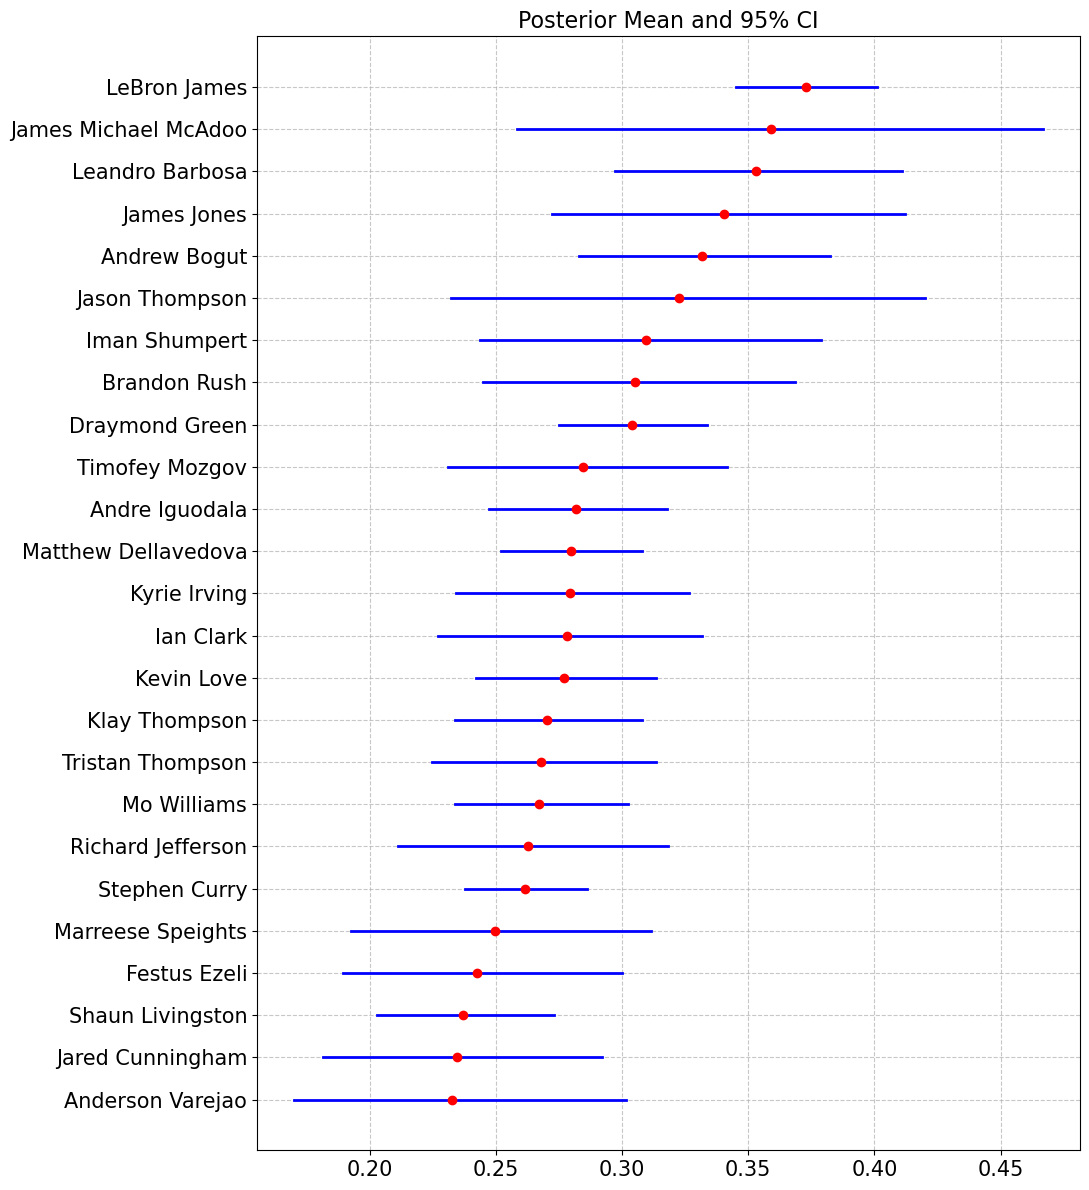

In [430]:
# visualization of posterior distribution (0.025q, posterior_mean, 0.975q)
import matplotlib.pyplot as plt

players = final[final["GP"] >= 10]['PLAYER']
theta = final[final["GP"] >= 10]['posterior_mean']
lower_bound = final[final["GP"] >= 10]['0.025q']
upper_bound = final[final["GP"] >= 10]['0.975q']

plt.figure(figsize=(11, 12))

# line connecting 0.025q and 0.975q
for player, lower, upper in zip(players, lower_bound, upper_bound):
    plt.plot([lower, upper], [player, player], color='blue', linewidth=2)

# posterior_mean
plt.scatter(theta, players, color='red', label='posterior_mean', zorder=5)

# label
plt.title('Posterior Mean and 95% CI', fontsize = 16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# show
plt.tight_layout()
plt.show()

# Hexagon Chart

In [152]:
## hexagon chart
# https://www.jphwang.com/posts/nba-shot-data-analytics-visualization-with-python-pandas-and-matplotlib-part-3/
# draw_court : http://savvastjortjoglou.com/nba-shot-sharts.html

In [153]:
CLE

,level_0,index,type,quarter,quarter_time,shot_clock,start_ball,end_ball,start_locations,end_locations,first_player,second_player,game_id,gamedate,visitor,home,Chance,GoodPass,passer_teamid,passer_id
0,0,0,pass,1,694.54,22.65,"[85.58063, -32.20436]","[77.39659, -41.05928]","[[-1.0, -1.0, 85.58063, -32.20436, 6.12211], [...","[[-1.0, -1.0, 77.39659, -41.05928, 3.965], [16...","[[1610612739.0, 201567.0]]","[[1610612739.0, 2590.0]]",21500002,2015-10-27,CLE,CHI,[],0,1.610613e+09,201567.0
1,1,0,pass,1,687.14,15.31,"[34.75367, -31.62725]","[28.21327, -36.59227]","[[-1.0, -1.0, 34.75367, -31.62725, 7.02781], [...","[[-1.0, -1.0, 28.21327, -36.59227, 6.43881], [...","[[1610612739.0, 2590.0]]","[[1610612739.0, 2544.0]]",21500002,2015-10-27,CLE,CHI,[],0,1.610613e+09,2590.0
2,2,0,pass,1,686.66,14.84,"[27.97766, -36.54447]","[9.19308, -27.9452]","[[-1.0, -1.0, 27.97766, -36.54447, 6.20019], [...","[[-1.0, -1.0, 9.19308, -27.9452, 4.29929], [16...","[[1610612739.0, 2544.0]]","[[1610612739.0, 201567.0]]",21500002,2015-10-27,CLE,CHI,[],0,1.610613e+09,2544.0
3,4,0,pass,1,671.38,23.69,"[83.75809, -26.39103]","[77.03251, -32.79359]","[[-1.0, -1.0, 83.75809, -26.39103, 7.815020000...","[[-1.0, -1.0, 77.03251, -32.79359, 6.46341], [...","[[1610612739.0, 202389.0]]","[[1610612739.0, 2590.0]]",21500002,2015-10-27,CLE,CHI,[],0,1.610613e+09,202389.0
4,6,0,pass,1,663.55,24.00,"[7.84565, -24.89136]","[4.77726, -21.94354]","[[-1.0, -1.0, 7.84565, -24.89136, 5.46014], [1...","[[-1.0, -1.0, 4.77726, -21.94354, 2.36154], [1...","[[1610612739.0, 202389.0]]","[[1610612741.0, 2200.0]]",21500002,2015-10-27,CLE,CHI,"[[1610612739.0, 2747.0, 26.84345, -8.87299, 0.0]]",0,1.610613e+09,202389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,14285,0,pass,4,48.30,24.00,"[92.82497, -23.61687]","[86.85578, -25.60996]","[[-1.0, -1.0, 92.82497, -23.61687, 2.74819], [...","[[-1.0, -1.0, 86.85578, -25.60996, 3.99966], [...","[[1610612739.0, 2590.0]]","[[1610612739.0, 202684.0]]",21500631,2016-01-20,CLE,BKN,[],0,1.610613e+09,2590.0
11468,14286,0,pass,4,48.30,24.00,"[86.85578, -25.60996]","[80.77568, -21.78331]","[[-1.0, -1.0, 86.85578, -25.60996, 3.99966], [...","[[-1.0, -1.0, 80.77568, -21.78331, 3.99282], [...","[[1610612739.0, 202684.0]]","[[1610612739.0, 2590.0]]",21500631,2016-01-20,CLE,BKN,[],0,1.610613e+09,202684.0
11469,14288,0,pass,4,23.87,16.90,"[81.7931, -20.86234]","[76.57978, -45.49478]","[[-1.0, -1.0, 81.7931, -20.86234, 10.01355], [...","[[-1.0, -1.0, 76.57978, -45.49478, 5.7386], [1...","[[1610612739.0, 202684.0]]","[[1610612751.0, 203499.0]]",21500631,2016-01-20,CLE,BKN,[],0,1.610613e+09,202684.0
11470,14289,0,pass,4,15.86,NaN,"[70.69002, -19.70224]","[62.66886, -15.79281]","[[-1.0, -1.0, 70.69002, -19.70224, 5.87762], [...","[[-1.0, -1.0, 62.66886, -15.79281, 3.79202], [...","[[1610612739.0, 202684.0]]","[[1610612739.0, 2210.0]]",21500631,2016-01-20,CLE,BKN,[],0,1.610613e+09,202684.0


In [154]:
CLE[['start_y', 'start_x']] = pd.DataFrame(CLE['start_ball'].tolist(), index=CLE.index)
CLE[['end_y', 'end_x']] = pd.DataFrame(CLE['end_ball'].tolist(), index=CLE.index)
GSW[['start_y', 'start_x']] = pd.DataFrame(GSW['start_ball'].tolist(), index=GSW.index)
GSW[['end_y', 'end_x']] = pd.DataFrame(GSW['end_ball'].tolist(), index=GSW.index)
"""
# set start, end xy with player's xy coordinates
for i in range(CLE.shape[0]):
    for location in CLE.at[i, "start_locations"]:
        if location[1] == CLE.at[i, "first_player"][0][1]:
            CLE.at[i, "start_y"] = location[2]
            CLE.at[i, "start_x"] = location[3]
    for location in CLE.at[i, "end_locations"]:
        if location[1] == CLE.at[i, "second_player"][0][1]:
            CLE.at[i, "end_y"] = location[2]
            CLE.at[i, "start_x"] = location[3]
for i in range(GSW.shape[0]):
    for location in GSW.at[i, "start_locations"]:
        if location[1] == GSW.at[i, "first_player"][0][1]:
            GSW.at[i, "start_y"] = location[2]
            GSW.at[i, "start_x"] = location[3]
    for location in GSW.at[i, "end_locations"]:
        if location[1] == GSW.at[i, "second_player"][0][1]:
            GSW.at[i, "end_y"] = location[2]
            GSW.at[i, "start_x"] = location[3]

"""

'\n# set start, end xy with player\'s xy coordinates\nfor i in range(CLE.shape[0]):\n    for location in CLE.at[i, "start_locations"]:\n        if location[1] == CLE.at[i, "first_player"][0][1]:\n            CLE.at[i, "start_y"] = location[2]\n            CLE.at[i, "start_x"] = location[3]\n    for location in CLE.at[i, "end_locations"]:\n        if location[1] == CLE.at[i, "second_player"][0][1]:\n            CLE.at[i, "end_y"] = location[2]\n            CLE.at[i, "start_x"] = location[3]\nfor i in range(GSW.shape[0]):\n    for location in GSW.at[i, "start_locations"]:\n        if location[1] == GSW.at[i, "first_player"][0][1]:\n            GSW.at[i, "start_y"] = location[2]\n            GSW.at[i, "start_x"] = location[3]\n    for location in GSW.at[i, "end_locations"]:\n        if location[1] == GSW.at[i, "second_player"][0][1]:\n            GSW.at[i, "end_y"] = location[2]\n            GSW.at[i, "start_x"] = location[3]\n\n'

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\323004072.py:13: RuntimeWarning: invalid value encountered in divide
  pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100


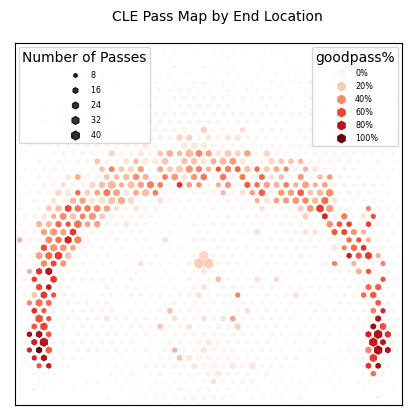

In [155]:
# CLE Hexagon map
plt.figure(figsize=(12,11))
chances_hex = plt.hexbin(
    CLE.end_x, CLE.end_y,
    extent=(-50, 0, 0, 47), cmap='Blues', gridsize=40)
plt.close()  # this closes the plot window

goodpass_df = CLE[CLE.GoodPass == 1]
goodpass_hex = plt.hexbin(
    goodpass_df['end_x'], goodpass_df['end_y'],
    extent=(-50, 0, 0, 47), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100
pcts_by_hex[np.isnan(pcts_by_hex)] = 0  # convert NAN values to 0
weight = 1.3
sizes = chances_hex.get_array() * weight

sample_sizes = chances_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in chances_hex.get_offsets()]
y = [i[1] for i in chances_hex.get_offsets()]
z = pcts_by_hex

plt.figure(figsize=(5, 4.7))
plt.xlim(-50, 0)
plt.ylim(0, 47)
scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Reds', marker='h')
#viz.draw_court(outer_lines=True)
#draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)


plt.text(-37.5, 50, "CLE Pass Map by End Location")
legend1 = plt.legend(
    *scatter.legend_elements(num=6, fmt="{x:.0f}%"),
    loc="upper right", title='goodpass%', fontsize='xx-small')
max_size = max(sizes)
legend2 = plt.legend(
    *scatter.legend_elements(
        "sizes", num = 6, alpha = 0.8
    ),
    loc='upper left', title='Number of Passes', fontsize='xx-small')
plt.gca().add_artist(legend1)

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\2960202757.py:13: RuntimeWarning: invalid value encountered in divide
  pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100


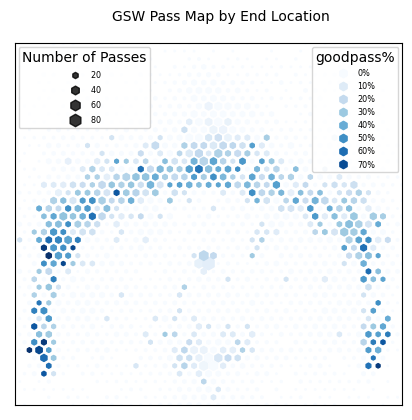

In [156]:
# GSW Hexagon map
plt.figure(figsize=(12,11))
chances_hex = plt.hexbin(
    GSW.end_x, GSW.end_y,
    extent=(-50, 0, 0, 47), cmap='Blues', gridsize=40)
plt.close()  # this closes the plot window

goodpass_df = GSW[GSW.GoodPass == 1]
goodpass_hex = plt.hexbin(
    goodpass_df['end_x'], goodpass_df['end_y'],
    extent=(-50, 0, 0, 47), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100
pcts_by_hex[np.isnan(pcts_by_hex)] = 0  # convert NAN values to 0
weight = 1.3
sizes = chances_hex.get_array() * weight

sample_sizes = chances_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in chances_hex.get_offsets()]
y = [i[1] for i in chances_hex.get_offsets()]
z = pcts_by_hex

plt.figure(figsize=(5, 4.7))
plt.xlim(-50, 0)
plt.ylim(0, 47)
scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Blues', marker='h')
#viz.draw_court(outer_lines=True)
#draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)


plt.text(-37.5, 50, "GSW Pass Map by End Location")
legend1 = plt.legend(
    *scatter.legend_elements(num=6, fmt="{x:.0f}%"),
    loc="upper right", title='goodpass%', fontsize='xx-small')
max_size = max(sizes)
legend2 = plt.legend(
    *scatter.legend_elements(
        "sizes", num = 6, alpha = 0.8
    ),
    loc='upper left', title='Number of Passes', fontsize='xx-small')
plt.gca().add_artist(legend1)

In [157]:
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\1642393952.py:13: RuntimeWarning: invalid value encountered in divide
  pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100


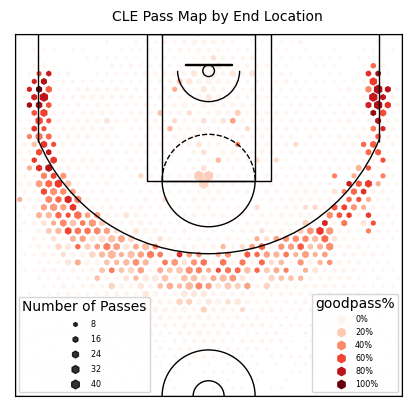

In [158]:
# CLE Hexagon map
plt.figure(figsize=(12,11))
chances_hex = plt.hexbin(
    (CLE.end_x + 25) * 10, (CLE.end_y - 4.75) * 10,
    extent=(-250, 250, 422.5, -47.5), cmap='Blues', gridsize=40)
plt.close()  # this closes the plot window

goodpass_df = CLE[CLE.GoodPass == 1]
goodpass_hex = plt.hexbin(
    (goodpass_df['end_x'] + 25) * 10, (goodpass_df['end_y'] - 4.75) * 10,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100
pcts_by_hex[np.isnan(pcts_by_hex)] = 0  # convert NAN values to 0
weight = 1.3
sizes = chances_hex.get_array() * weight

sample_sizes = chances_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in chances_hex.get_offsets()]
y = [i[1] for i in chances_hex.get_offsets()]
z = pcts_by_hex

plt.figure(figsize=(5, 4.7))
plt.xlim(-250, 250)
plt.ylim(422.5, -47.5)
scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Reds', marker='h')
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)


plt.text(-125, -65, "CLE Pass Map by End Location")
legend1 = plt.legend(
    *scatter.legend_elements(num=6, fmt="{x:.0f}%"),
    loc="lower right", title='goodpass%', fontsize='xx-small')
max_size = max(sizes)
legend2 = plt.legend(
    *scatter.legend_elements(
        "sizes", num = 6, alpha = 0.8
    ),
    loc='lower left', title='Number of Passes', fontsize='xx-small')
plt.gca().add_artist(legend1)

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\4238154263.py:13: RuntimeWarning: invalid value encountered in divide
  pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100


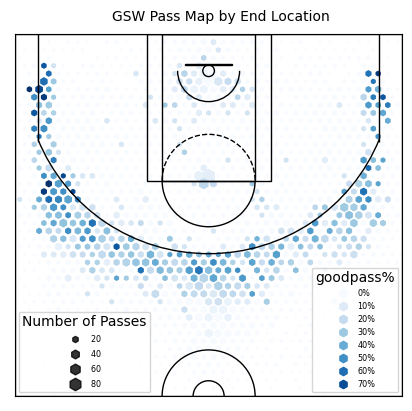

In [159]:
# GSW Hexagon map
plt.figure(figsize=(12,11))
chances_hex = plt.hexbin(
    (GSW.end_x + 25) * 10, (GSW.end_y - 4.75) * 10,
    extent=(-250, 250, 422.5, -47.5), cmap='Blues', gridsize=40)
plt.close()  # this closes the plot window

goodpass_df = GSW[GSW.GoodPass == 1]
goodpass_hex = plt.hexbin(
    (goodpass_df['end_x'] + 25) * 10, (goodpass_df['end_y'] - 4.75) * 10,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = goodpass_hex.get_array() / chances_hex.get_array() * 100
pcts_by_hex[np.isnan(pcts_by_hex)] = 0  # convert NAN values to 0
weight = 1.3
sizes = chances_hex.get_array() * weight

sample_sizes = chances_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in chances_hex.get_offsets()]
y = [i[1] for i in chances_hex.get_offsets()]
z = pcts_by_hex

plt.figure(figsize=(5, 4.7))
plt.xlim(-250, 250)
plt.ylim(422.5, -47.5)
scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Blues', marker='h')
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)


plt.text(-125, -65, "GSW Pass Map by End Location")
legend1 = plt.legend(
    *scatter.legend_elements(num=6, fmt="{x:.0f}%"),
    loc="lower right", title='goodpass%', fontsize='xx-small')
max_size = max(sizes)
legend2 = plt.legend(
    *scatter.legend_elements(
        "sizes", num = 6, alpha = 0.8
    ),
    loc='lower left', title='Number of Passes', fontsize='xx-small')
plt.gca().add_artist(legend1)

# Directionaity

In [160]:
## directionaly visualization

# caculate angle of pass
# caculate angle of chances
# filter data within 3 locations (wing -> basket) (symmetric?) (특정 점 좌표 잡고 그 좌표에서 거리가 n이하인 데이터 필터링)
# circular KDE
# KL divergence
# visualize (한 선수당 하나의 이미지에 각 위치에서의 분포 시각화 + KL-D)
# result (몇 몇 선수만)(LBJ, Kyrie, SC30, Green, )

In [235]:
hoop_x = 4.75
hoop_y = -25 

CLE["Pass_Angle"] = None
CLE["Chance_Angles"] = None
for i in range(CLE.shape[0]):
    start_x = CLE.at[i, "start_x"]
    start_y = CLE.at[i, "start_y"]
    end_x = CLE.at[i, "end_x"]
    end_y = CLE.at[i, "end_y"]
    hoopvec = [hoop_x - start_x, hoop_y - start_y]
    passvec = [end_x - start_x, end_y - start_y]
    angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )
    cross_product = hoopvec[0] * passvec[1] - hoopvec[1] * passvec[0]
    if cross_product < 0:
        angle = 2 * math.pi - angle
    CLE.at[i, "Pass_Angle"] = angle
    
    if len(CLE.at[i, "Chance"]) > 0:
        angles = []
        for chance in CLE.at[i, "Chance"]:
            end_y = chance[2]
            end_x = chance[3]
            hoopvec = [hoop_x - start_x, hoop_y - start_y]
            passvec = [end_x - start_x, end_y - start_y]
            angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )
            cross_product = hoopvec[0] * passvec[1] - hoopvec[1] * passvec[0]
            if cross_product < 0:
                angle = 2 * math.pi - angle
            angles.append(angle)
        CLE.at[i, "Chance_Angles"] = angles

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\531345812.py:13: RuntimeWarning: invalid value encountered in scalar divide
  angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )


In [238]:
GSW["Pass_Angle"] = None
GSW["Chance_Angles"] = None
for i in range(GSW.shape[0]):
    start_x = GSW.at[i, "start_x"]
    start_y = GSW.at[i, "start_y"]
    end_x = GSW.at[i, "end_x"]
    end_y = GSW.at[i, "end_y"]
    hoopvec = [hoop_x - start_x, hoop_y - start_y]
    passvec = [end_x - start_x, end_y - start_y]
    angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )
    cross_product = hoopvec[0] * passvec[1] - hoopvec[1] * passvec[0] #cross product of vectors. to find out the direction of a pass
    if cross_product < 0: # pass to the right side of rim
        angle = 2 * math.pi - angle
    GSW.at[i, "Pass_Angle"] = angle
    
    if len(GSW.at[i, "Chance"]) > 0:
        angles = []
        for chance in GSW.at[i, "Chance"]:
            end_y = chance[2]
            end_x = chance[3]
            hoopvec = [hoop_x - start_x, hoop_y - start_y]
            passvec = [end_x - start_x, end_y - start_y]
            angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )
            cross_product = hoopvec[0] * passvec[1] - hoopvec[1] * passvec[0]
            if cross_product < 0:
                angle = 2 * math.pi - angle
            angles.append(angle)
    
        GSW.at[i, "Chance_Angles"] = angles

C:\Users\alstj\AppData\Local\Temp\ipykernel_13744\2725355054.py:10: RuntimeWarning: invalid value encountered in scalar divide
  angle = math.acos( (hoopvec[0] * passvec[0] + hoopvec[1] * passvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(passvec)) )


In [363]:
# vonmises kde
def vonmises_kde(data, kappa = 35, n_bins=100):
    # MLE_kappa(data)
    bins = np.linspace(-np.pi, np.pi, n_bins)
    x = np.linspace(-np.pi, np.pi, n_bins)
    # integrate vonmises kernels
    kde = np.exp(kappa*np.cos(x[:, None]-data[None, :])).sum(1)/(2*np.pi*i0(kappa))
    
    r_sq = kde * kde
    kde /= np.sqrt(np.trapz(r_sq, x=bins)) # normalization
    return bins, kde

# KL-Divergence
def KL_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def kde_hist_plot(player, team, kappa = 25):
    player_id = float(players_info[players_info["Name"] == player]["playerid"])
    if team == "CLE":
        data = CLE[CLE["passer_id"] == player_id].reset_index(drop=True)
    else:
        data = GSW[GSW["passer_id"] == player_id].reset_index(drop=True)
    
    data = np.array(list(data["Pass_Angle"]))
    
    # plot data histogram
    fig, axes = plt.subplots(2, 1, subplot_kw={'projection': 'polar'})
    axes[0].hist(data, 100)

    # plot kernel density estimates
    x, kde = vonmises_kde(data, kappa)
    axes[1].plot(x, kde)
    
    # Set North as 0 and clockwide direction
    axes[0].set_theta_zero_location('N')
    axes[0].set_theta_direction(1)
    axes[1].set_theta_zero_location('N')
    axes[1].set_theta_direction(1)
    axes[0].set_yticks([])
    axes[1].set_yticks([])
    
    plt.show()    

def kde_pass_goodlooks(player, team, location = None, kappa = 25):
    player_id = float(players_info[players_info["Name"] == player]["playerid"])
    if team == "CLE":
        data = CLE[CLE["passer_id"] == player_id].reset_index(drop=True)
    else:
        data = GSW[GSW["passer_id"] == player_id].reset_index(drop=True)
    
    hoop_angle = None
    if location != None:
        distance_to_location = ((data['start_x'] - location[0])**2 + (data['start_y'] - location[1])**2)**0.5
        data = data[distance_to_location <= 3]
        hoop_x = 4.75
        hoop_y = -25
        hoopvec = [hoop_y - location[0], hoop_x - location[1]]
        standvec = [location[0] - location[0], 0 - location[1]]
        hoop_angle = math.acos( (hoopvec[0] * standvec[0] + hoopvec[1] * standvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(standvec)) )
    
    data1 = np.array(list(data["Pass_Angle"]))
    data2 = []
    for angles in data["Chance_Angles"]:
        if angles != None:
            for angle in angles:
                data2.append(angle)
    data2 = np.array(data2)
    
    fig, ax = plt.subplots(subplot_kw={'polar': 'polar'})

    # Plot von Mises KDE
    x1, kde1 = vonmises_kde(data1, kappa)
    ax.plot(x1, kde1, color='blue', label='pass')

    x2, kde2 = vonmises_kde(data2, kappa)
    ax.plot(x2, kde2, color='red', label='good look')

    # Set North as 0 and clockwide direction
    if hoop_angle != None:
        if location[0] > -25:
            hoop_angle = np.pi / 2 + hoop_angle
        else:
            hoop_angle = np.pi / 2 - hoop_angle
        ax.set_theta_offset(hoop_angle)
    else:
       ax.set_theta_offset(np.pi / 2) 
    ax.set_theta_direction(1)

    #KL-Divergence
    kl = KL_divergence(kde1, kde2)
    kl = round(kl, 1)
    
    # Add legend
    ax.legend(title='KL-Divergenc: ' + str(kl))
    ax.set_yticks([])

    plt.show()

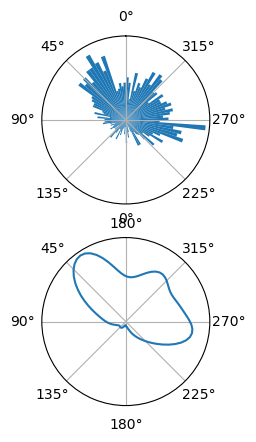

In [274]:
kde_hist_plot("LeBron James", "CLE")

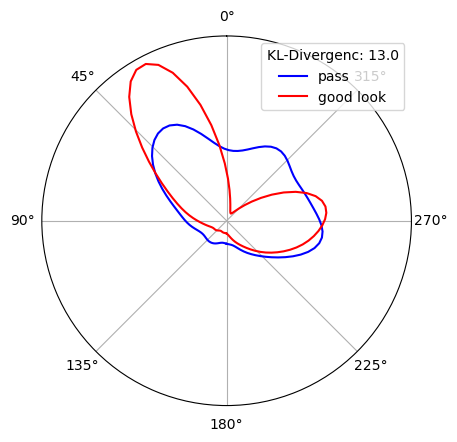

In [303]:
kde_pass_goodlooks("LeBron James", "CLE")

In [380]:
# interested spots on the court
left_wing = [-37, 26.5] # x cordinates are arithmetic sequences , 28.5 : y cordinate of top 3
right_wing = [-13, 26.5]
left_high = [-33,  19] # corner of the paint box
right_high = [-17, 19]
left_low = [-29, 11.875] # one half point of high and hoop
right_low = [-21, 11.875]
top = [-25, 28.5] # 28.5 or 30

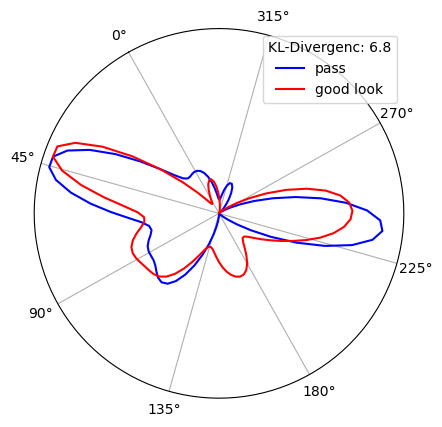

In [304]:
kde_pass_goodlooks("LeBron James", "CLE", right_low)

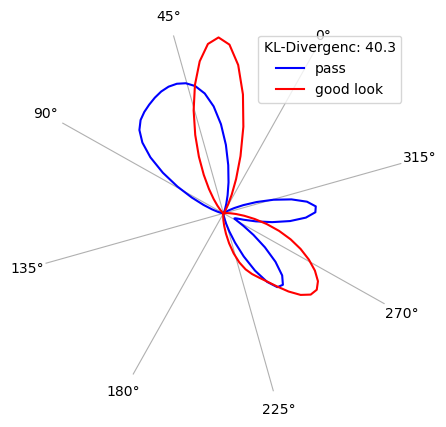

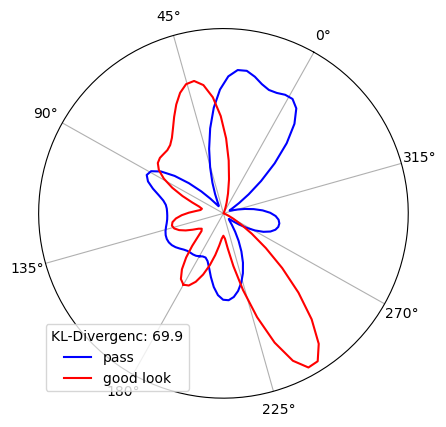

In [382]:
kde_pass_goodlooks("Kyrie Irving", "CLE", left_high)
kde_pass_goodlooks("Stephen Curry", "GSW", left_low)

In [447]:
def kde_pass_goodlooks_on(player, team, location = None, kappa = 25, ax1 = None):
    player_id = float(players_info[players_info["Name"] == player]["playerid"])
    if team == "CLE":
        data = CLE[CLE["passer_id"] == player_id].reset_index(drop=True)
    else:
        data = GSW[GSW["passer_id"] == player_id].reset_index(drop=True)
    
    hoop_angle = None
    if location != None:
        distance_to_location = ((data['start_x'] - location[0])**2 + (data['start_y'] - location[1])**2)**0.5
        data = data[distance_to_location <= 3]
        hoop_x = 4.75
        hoop_y = -25
        hoopvec = [hoop_y - location[0], hoop_x - location[1]]
        standvec = [location[0] - location[0], 0 - location[1]]
        hoop_angle = math.acos( (hoopvec[0] * standvec[0] + hoopvec[1] * standvec[1]) / (np.linalg.norm(hoopvec) * np.linalg.norm(standvec)) )
    
    data1 = np.array(list(data["Pass_Angle"]))
    data2 = []
    for angles in data["Chance_Angles"]:
        if angles != None:
            for angle in angles:
                data2.append(angle)
    data2 = np.array(data2)

    ax = plt.axes([(location[0] + 50) / 50 - 0.1, 1 - location[1] / 47 - 0.1, 0.2, 0.2], frameon=False, polar=True)

    # Plot von Mises KDE
    x1, kde1 = vonmises_kde(data1, kappa)
    ax.plot(x1, kde1, color='blue', label='pass')
    ax.fill_between(x1, 0, kde1, color='blue', alpha=0.3)

    x2, kde2 = vonmises_kde(data2, kappa)
    ax.plot(x2, kde2, color='red', label='good look')
    ax.fill_between(x2, 0, kde2, color='red', alpha=0.3)

    # Set North as 0 and clockwide direction
    if hoop_angle != None:
        if location[0] > -25:
            hoop_angle = np.pi / 2 + hoop_angle
        else:
            hoop_angle = np.pi / 2 - hoop_angle
        ax.set_theta_offset(hoop_angle)
    else:
       ax.set_theta_offset(np.pi / 2) 
    ax.set_theta_direction(1)

    #KL-Divergence
    kl = KL_divergence(kde2, kde1)
    kl = round(kl, 1)
    
    ax.axis('off')
    
    # Add legend
    ax.legend([], title='KL-Divergenc: ' + str(kl), fontsize = 'xx-small', title_fontsize = "medium")
    ax.set_yticks([])

    return ax

def plot_kde_on_court(player, team):
    size_weight = 2.5
    fig, ax = plt.subplots(figsize=(5 * size_weight, 4.7 * size_weight))
    ax.set_title(player, fontsize = 16)
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -47.5)
    ax.axis('off')
    draw_court(outer_lines=True)

    kde_pass_goodlooks_on(player, team, location=left_wing, ax1=ax) 
    kde_pass_goodlooks_on(player, team, location=right_wing, ax1=ax)
    kde_pass_goodlooks_on(player, team, location=left_high, ax1=ax) 
    kde_pass_goodlooks_on(player, team, location=right_high, ax1=ax)
    kde_pass_goodlooks_on(player, team, location=left_low, ax1=ax)  
    kde_pass_goodlooks_on(player, team, location=right_low, ax1=ax) 
    kde_pass_goodlooks_on(player, team, location=top, ax1=ax) 
    
    plt.show()

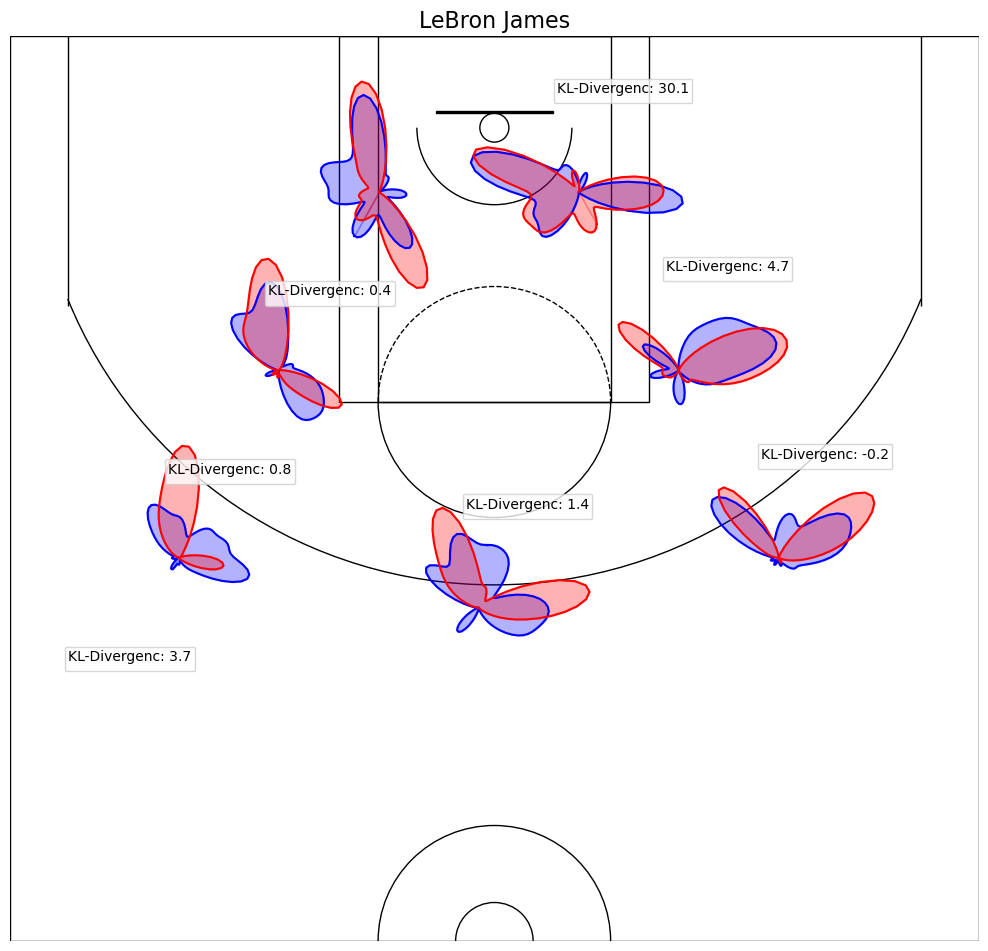

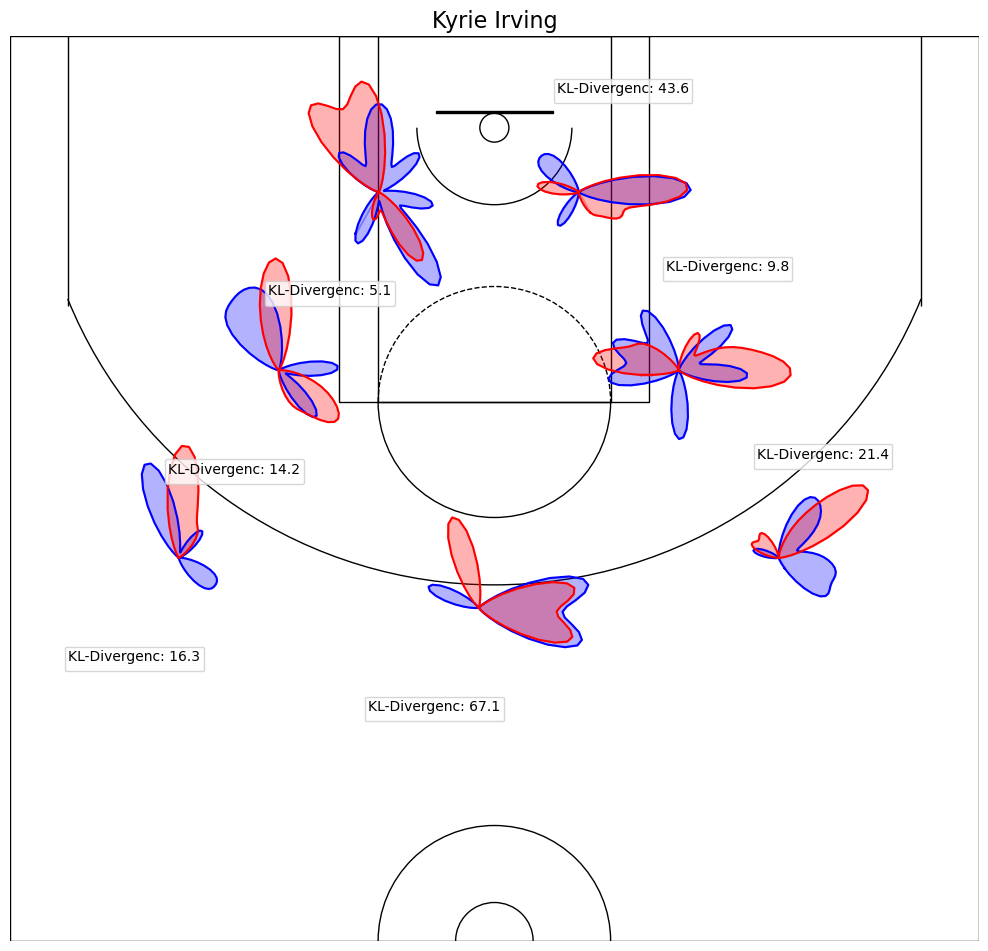

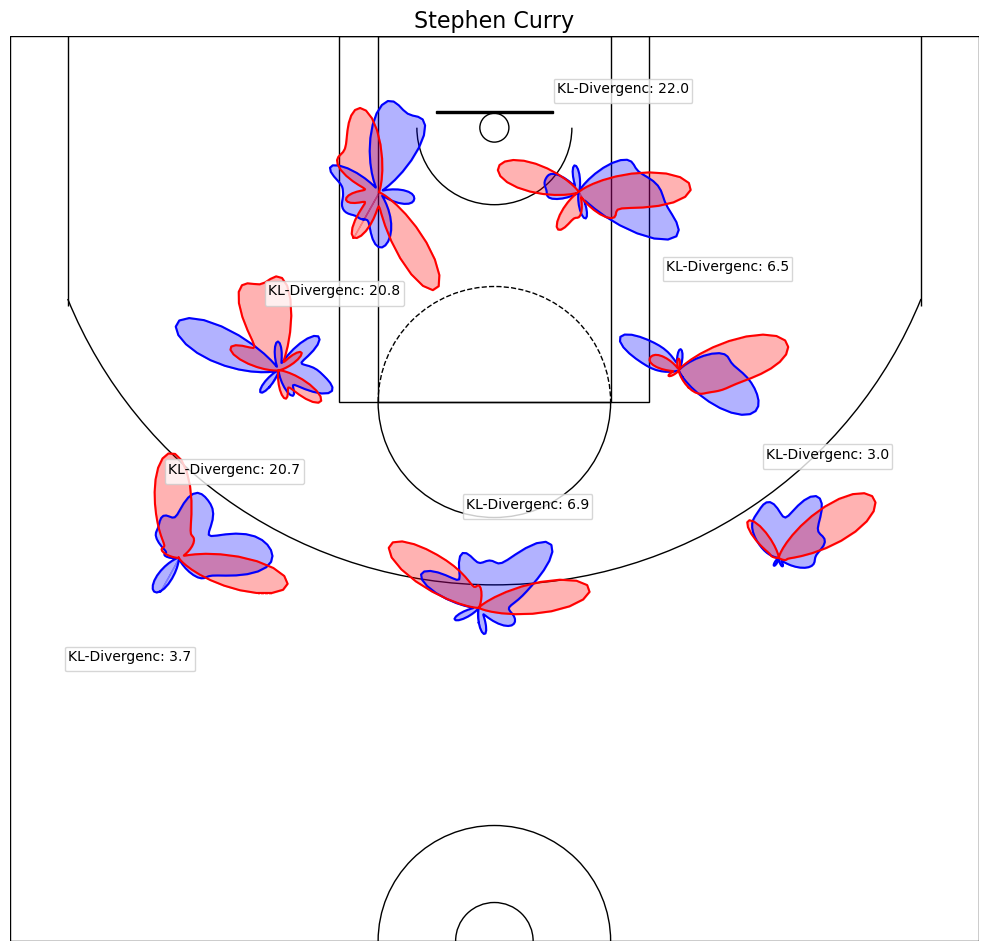

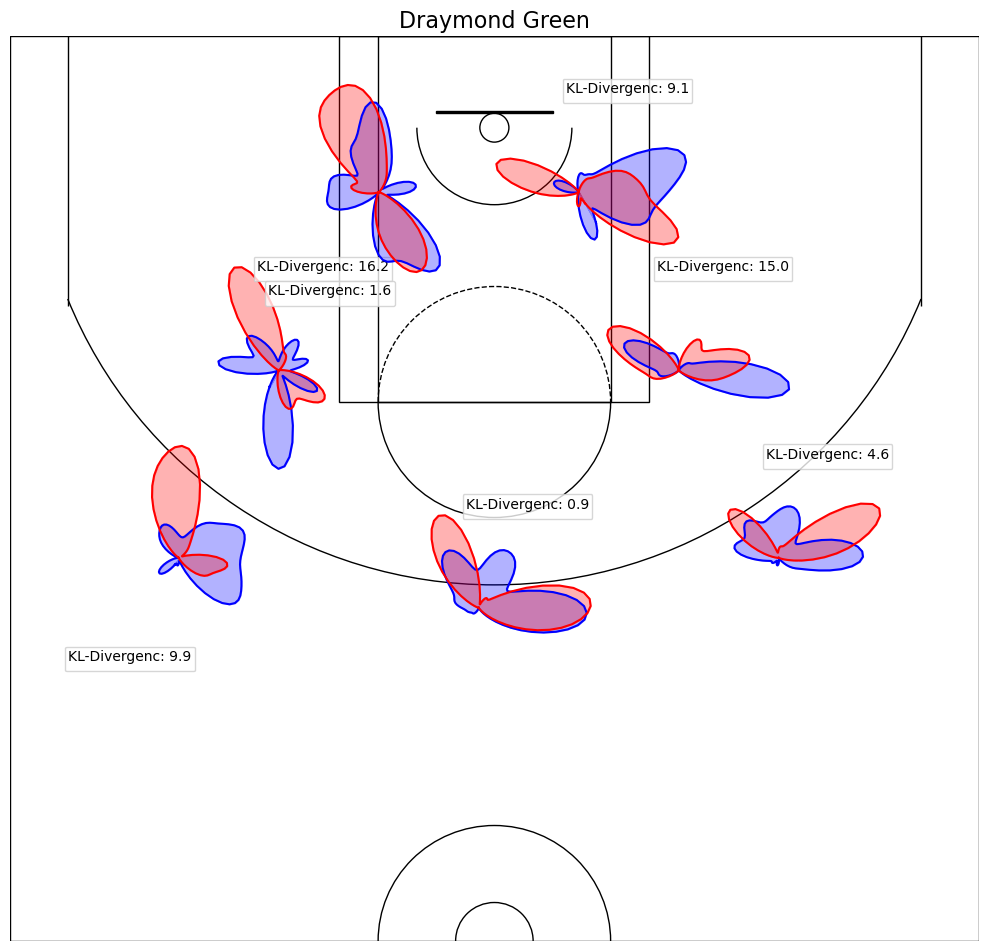

In [448]:
plot_kde_on_court("LeBron James", "CLE")
plot_kde_on_court("Kyrie Irving", "CLE")
plot_kde_on_court("Stephen Curry", "GSW")
plot_kde_on_court("Draymond Green", "GSW")

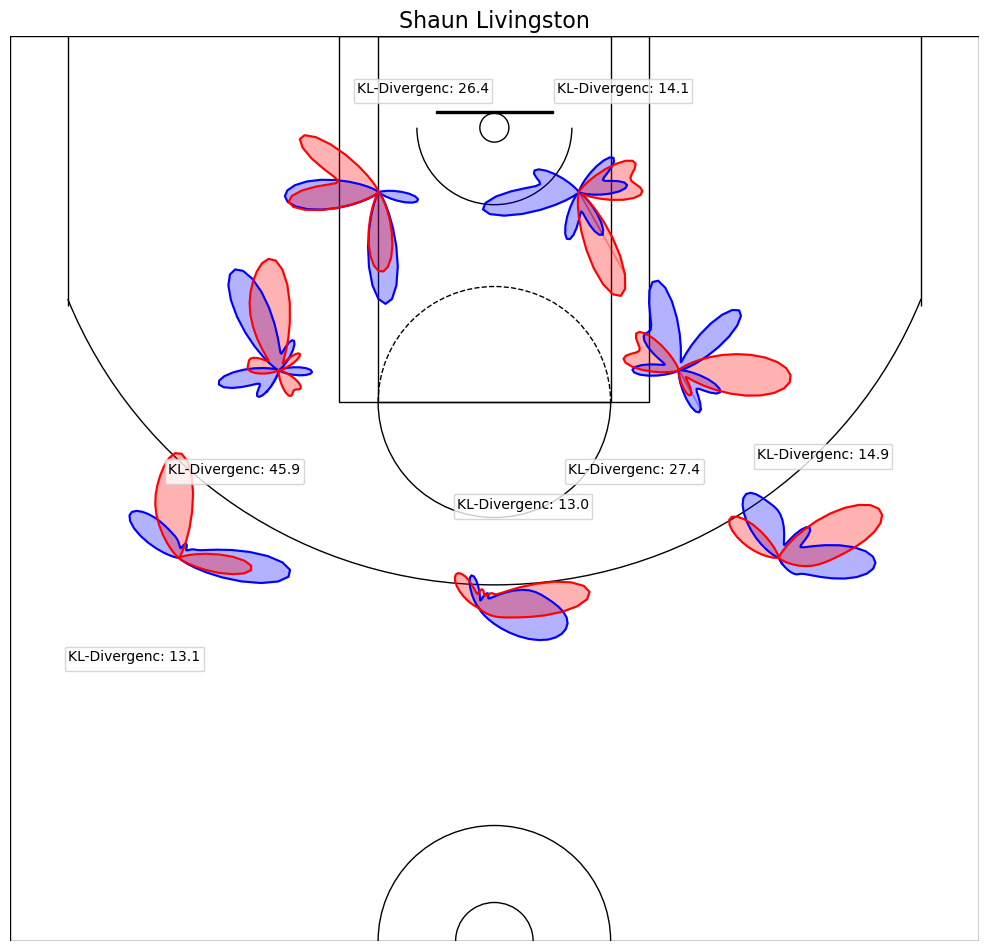

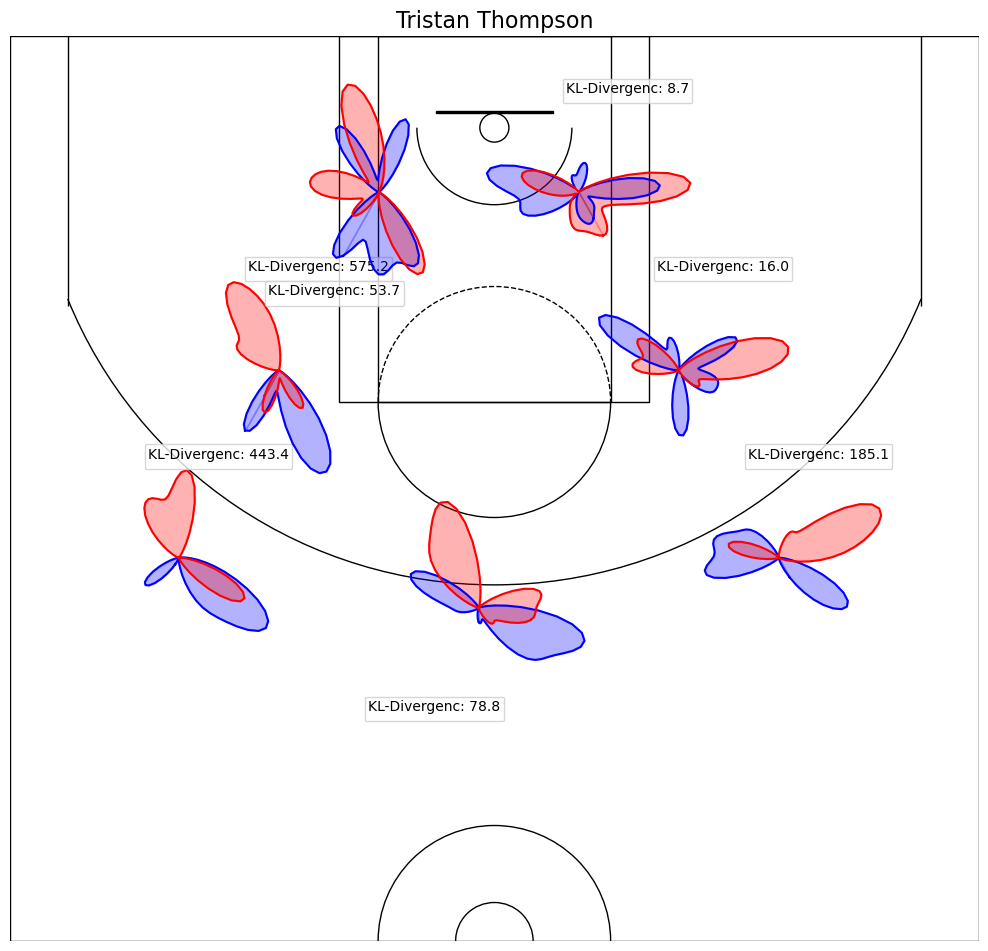

In [438]:
plot_kde_on_court("Shaun Livingston", "GSW")
plot_kde_on_court("Tristan Thompson", "CLE")